# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [117]:
import numpy as np
import pandas as pd
import matplotlib as mlb
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [95]:
df = pd.read_csv("../data/states_edu.csv")
list1 = list(df)
print (list1)
df.head()

['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [96]:
df.dropna()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
561,2003_ALABAMA,ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
562,2003_ALASKA,ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
563,2003_ARIZONA,ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
564,2003_ARKANSAS,ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
565,2003_CALIFORNIA,CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1219,2015_VIRGINIA,VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
1220,2015_WASHINGTON,WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
1221,2015_WEST_VIRGINIA,WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0
1222,2015_WISCONSIN,WISCONSIN,2015,861813.0,11637376.0,814385.0,5869265.0,4953726.0,11553677.0,5723474.0,...,60999.0,61084.0,66253.0,489919.0,263896.0,867800.0,243.0,289.0,223.0,270.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [97]:
diff = df["YEAR"].max() - df["YEAR"].min()
print ("Data ranges for", diff, "years")

Data ranges for 33 years


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [98]:
df.head(10)
MichAvg = (df[df["STATE"] == "MICHIGAN"]["AVG_MATH_4_SCORE"].mean() + df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean() + 
df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].mean() + df[df["STATE"] == "MICHIGAN"]["AVG_READING_8_SCORE"].mean())

OhioAvg = (df[df["STATE"] == "OHIO"]["AVG_MATH_4_SCORE"].mean() + df[df["STATE"] == "MICHIGAN"]["AVG_MATH_8_SCORE"].mean() + 
df[df["STATE"] == "MICHIGAN"]["AVG_READING_4_SCORE"].mean() + df[df["STATE"] == "MICHIGAN"]["AVG_READING_8_SCORE"].mean())

def higherAvgOutcome(MichAvg, OhioAvg):
    if MichAvg > OhioAvg:
        print("Michigan's average of", MichAvg, "is higher than Ohio's average of", OhioAvg, "across all years")
    else:
        print("Ohio's average of", OhioAvg, "is higher than Michigan's average of", MichAvg, "across all years")

higherAvgOutcome(MichAvg, OhioAvg)

Ohio's average of 996.9545454545455 is higher than Michigan's average of 991.8636363636364 across all years


Find the average for your outcome score across all states in 2019

In [99]:
da = (df.groupby("YEAR")["AVG_MATH_4_SCORE"].mean() + df.groupby("YEAR")["AVG_MATH_8_SCORE"].mean()
     + df.groupby("YEAR")["AVG_READING_4_SCORE"].mean() + df.groupby("YEAR")["AVG_READING_8_SCORE"].mean())
print("The average for your outcome score across all states in 2019 is", da[2019])

The average for your outcome score across all states in 2019 is 1003.566037735849


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [100]:
db = (df.groupby("STATE")["AVG_MATH_4_SCORE"].max() + df.groupby("STATE")["AVG_MATH_8_SCORE"].max()
     + df.groupby("STATE")["AVG_READING_4_SCORE"].max() + df.groupby("STATE")["AVG_READING_8_SCORE"].max())
print(db)

STATE
ALABAMA                  981.0
ALASKA                   995.0
ARIZONA                 1002.0
ARKANSAS                1000.0
CALIFORNIA               991.0
COLORADO                1037.0
CONNECTICUT             1039.0
DELAWARE                1020.0
DISTRICT_OF_COLUMBIA     968.0
DODEA                   1058.0
FLORIDA                 1022.0
GEORGIA                 1009.0
HAWAII                  1003.0
IDAHO                   1022.0
ILLINOIS                1013.0
INDIANA                 1036.0
IOWA                    1026.0
KANSAS                  1032.0
KENTUCKY                1022.0
LOUISIANA                980.0
MAINE                   1034.0
MARYLAND                1041.0
MASSACHUSETTS           1069.0
MICHIGAN                1004.0
MINNESOTA               1046.0
MISSISSIPPI              990.0
MISSOURI                1019.0
MONTANA                 1037.0
NATIONAL                1018.0
NEBRASKA                1031.0
NEVADA                   995.0
NEW_HAMPSHIRE           1056.0
NE

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [118]:
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
df['EXPENDITURE_REVENUE_RATION'] = df['TOTAL_EXPENDITURE'] / df['TOTAL_REVENUE']

Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

The graph below illustrates the relationship between each state in the databse and their corresponding average 8th grade math scores


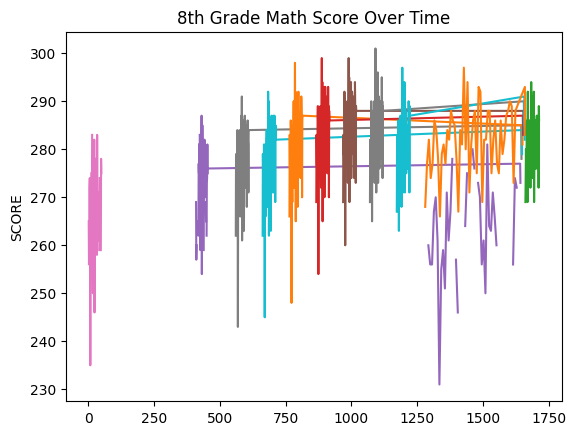

In [148]:
#da = df.groupby("STATE")[['EXPENDITURE_PER_STUDENT', 'AVG_MATH_4_SCORE']].mean()
#plt.hist(da)
df.groupby('YEAR')["AVG_MATH_8_SCORE"].plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')
print("The graph below illustrates the relationship between each state in the databse and their corresponding average 8th grade math scores")

**<CAPTION FOR VIZ 1>**

**Visualization 2**

The graph below illustrates the relationship between the total expenditure and totaln revenue spent by all states over time (33 years). We can observe that, on the whole, the line plots for total expenditure and total revenue overlap. This implies that there is a balance in spending and earning. However, it is important to note that between 2007 and 2010, government expenditure did exceed government revenue. Implying that there was a slight deficit that was marginally recovered from 2013 onwards.


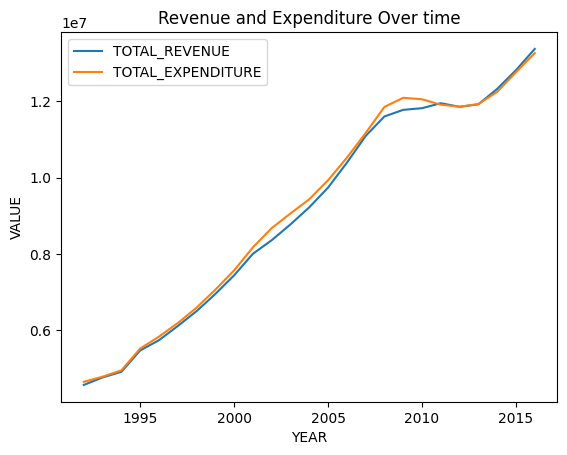

In [150]:
df.groupby('YEAR')[["TOTAL_REVENUE",'TOTAL_EXPENDITURE']].mean().plot()
plt.ylabel('VALUE')
plt.title('Revenue and Expenditure Over time')
print("The graph below illustrates the relationship between the total expenditure and totaln revenue spent by all states over time (33 years). We can observe that, on the whole, the line plots for total expenditure and total revenue overlap. This implies that there is a balance in spending and earning. However, it is important to note that between 2007 and 2010, government expenditure did exceed government revenue. Implying that there was a slight deficit that was marginally recovered from 2013 onwards.")

**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [151]:
from sklearn.model_selection import train_test_split


In [152]:
X = df[['ENROLL','AVG_MATH_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']
y.fillna(y.median(), inplace=True)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [154]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [155]:
# create your model here
model = LinearRegression()

In [156]:
model.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [168]:
# Metrics of evaluation
print("Proportion of variance in dependent variable due to independent variable:", model.score(X_test, y_test), "Usually, an R2 value closer to one implies a strong correlation, but not necessarily causation.")
print("Average of all errors in the dataset:", np.mean(model.predict(X_test)-y_test))
print("A measurement of pure magnitude illustrating the difference between the true value and the predicted value in absolute terms", np.mean(np.abs(model.predict(X_test)-y_test)))
print("The average difference between values predicted by our model and the real values", np.mean((model.predict(X_test)-y_test)**2)**0.5)

Proportion of variance in dependent variable due to independent variable: 0.8754531046156429 Usually, an R2 value closer to one implies a strong correlation, but not necessarily causation.
Average of all errors in the dataset: 0.2627979399341111
A measurement of pure magnitude illustrating the difference between the true value and the predicted value in absolute terms 2.0303156469393437
The average difference between values predicted by our model and the real values 2.3969961323705133


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

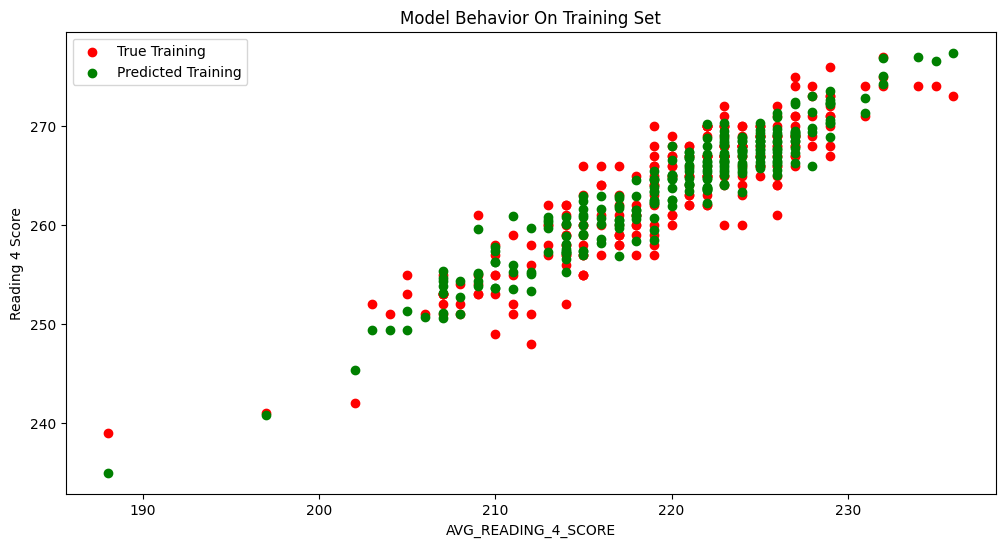

In [169]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Reading 4 Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

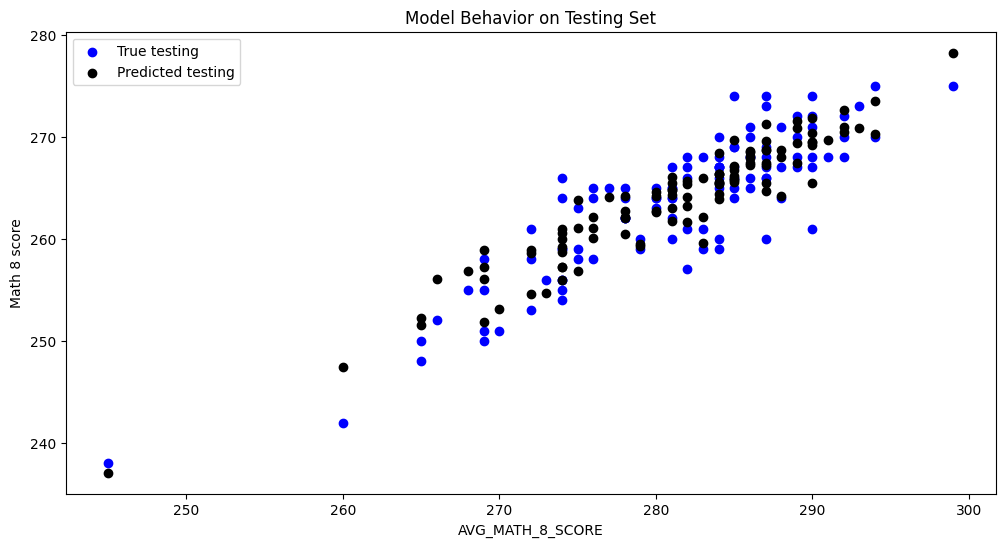

In [170]:
col_name = 'AVG_MATH_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

In [176]:
print("The model seems to perform well because...")
print()
print("The high R-squared value suggests that the data fits in well.")
print("The mean error is close to zero, meaning, that on average, the predictions are quite accurate.")
print("The mean absolute error and root mean squared error values are relatively small, indicating that the predictions have low average error and reasonably predictive performance.")
print("However, statistics always come with a caveat. While these metrics suggest good overall performance, we cannot gaurantee anything. We must take other factors into account such as bias and objective of conducting the data collection. The data could possibly be skewed and may appear more favorable than it really is. A good way to check whether the performance of the model is objective and perhaps to true to all data is to deploy the model on unseen data to ensure its generalizability and universality.)")

The model seems to perform well because...

The high R-squared value suggests that the data fits in well.
The mean error is close to zero, meaning, that on average, the predictions are quite accurate.
The mean absolute error and root mean squared error values are relatively small, indicating that the predictions have low average error and reasonably predictive performance.
However, statistics always come with a caveat. While these metrics suggest good overall performance, we cannot gaurantee anything. We must take other factors into account such as bias and objective of conducting the data collection. The data could possibly be skewed and may appear more favorable than it really is. A good way to check whether the performance of the model is objective and perhaps to true to all data is to deploy the model on unseen data to ensure its generalizability and universality.)
